In [1]:
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../datasets/auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
269,30.9,4,105.0,75,2230,14.5,78,1,dodge omni
56,26.0,4,91.0,70,1955,20.5,71,1,plymouth cricket
357,32.9,4,119.0,100,2615,14.8,81,3,datsun 200sx
46,22.0,4,140.0,72,2408,19.0,71,1,chevrolet vega (sw)
79,26.0,4,96.0,69,2189,18.0,72,2,renault 12 (sw)


In [5]:
data.shape

(398, 9)

In [6]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [8]:
data['origin'].unique()

array([1, 3, 2], dtype=int64)

In [9]:
data['horsepower'].min(),data['horsepower'].max()

('100', '?')

while exploring we can find out any problems in data...Now we were able to find that our dataset has a special character in it.

In [10]:
data['horsepower'].sort_values(ascending=False)[:20]

336     ?
32      ?
354     ?
374     ?
126     ?
330     ?
228    98
179    98
82     97
241    97
71     97
149    97
273    97
268    97
174    97
173    97
16     97
171    96
219    96
390    96
Name: horsepower, dtype: object

In [11]:
data['cylinders'].max(),data['cylinders'].min()

(8, 3)

In [12]:
data['model year'].max(),data['model year'].min()

(82, 70)

In [13]:
data['mpg'].max(),data['mpg'].min()

(46.6, 9.0)

In [14]:
len(data['car name'].unique())

305

In [15]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
data =  data.replace('?',np.nan)

In [17]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.shape

(392, 9)

origin and car name doesnt have much impact on prediction, so we choose to ignore it.

In [20]:
data.drop(columns=['origin','car name'],inplace=True)

# Feature Engineering

In [21]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [22]:
data['model year'] = '19'+data['model year'].astype(str)

In [23]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


Now lets find out the age of the car from year of manufacturing

In [24]:
data['age'] = datetime.datetime.now().year - pd.to_numeric(data['model year'])

In [25]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,1970,50
1,15.0,8,350.0,165,3693,11.5,1970,50
2,18.0,8,318.0,150,3436,11.0,1970,50
3,16.0,8,304.0,150,3433,12.0,1970,50
4,17.0,8,302.0,140,3449,10.5,1970,50


Now that we have the age of the car, we can drop model year

In [26]:
data.drop(['model year'],axis=1,inplace=True)

In [27]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,50
1,15.0,8,350.0,165,3693,11.5,50
2,18.0,8,318.0,150,3436,11.0,50
3,16.0,8,304.0,150,3433,12.0,50
4,17.0,8,302.0,140,3449,10.5,50


In [28]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

To build ML models, all of the column values should be numeric . So lets convert horsepower column from obj type to numreric type

pandas.to_numeric(arg, errors='raise', downcast=None)[source]¶
Convert argument to a numeric type.

The default return dtype is float64 or int64 depending on the data supplied. Use the downcast parameter to obtain other dtypes.

errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’

If ‘raise’, then invalid parsing will raise an exception.

If ‘coerce’, then invalid parsing will be set as NaN.

If ‘ignore’, then invalid parsing will return the input.

In [29]:
data['horsepower'] = pd.to_numeric(data.horsepower, errors = 'coerce')

In [30]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
age               int64
dtype: object

chek if any null values have be created by errors during conversion

In [31]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
age             0
dtype: int64

Nope.....

# Exploration Using Visualization

First lets check for pairwise relationships

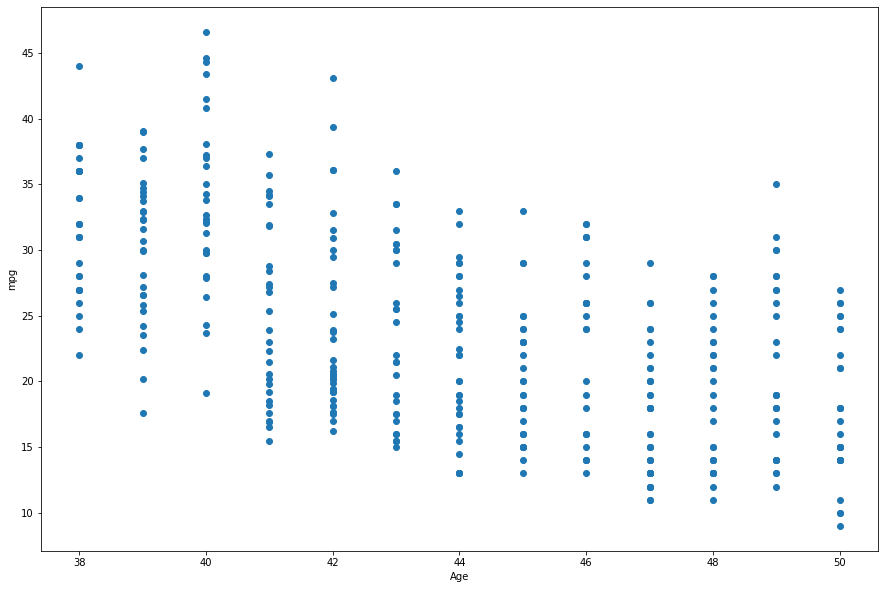

In [32]:
fig, ax = plt.subplots(figsize=(15,10))

plt.scatter(data['age'],data['mpg'])
plt.xlabel("Age")
plt.ylabel("mpg")

plt.show()

 it might be possible that the older car is, the lower its mileage. Let's see if that's true using our visualization. And you can see that there is a definite downward trend here. Now this doesn't necessarily mean that a relationship does exist that needs more statistical analysis, but this visualization seems to tell us that older cars have lower mileage.

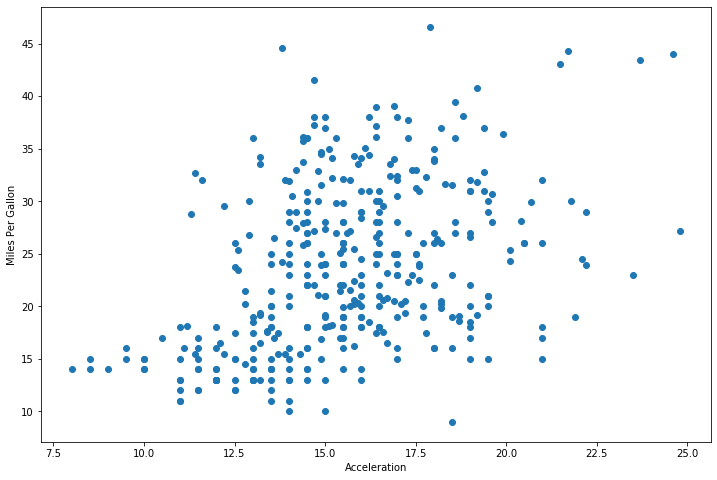

In [33]:
fig, ax = plt.subplots(figsize = (12,8))

plt.scatter(data['acceleration'],data['mpg'])

plt.xlabel("Acceleration")
plt.ylabel("Miles Per Gallon")

plt.show()

This time we'll try and see whether the acceleration of a particular car has any impact on mileage. Here is our resulting scatter plot, and you can see with acceleration on the x axis and miles per gallon on the y axis, there's a definite upward slope to the scatter plot. So maybe there is a relationship here.

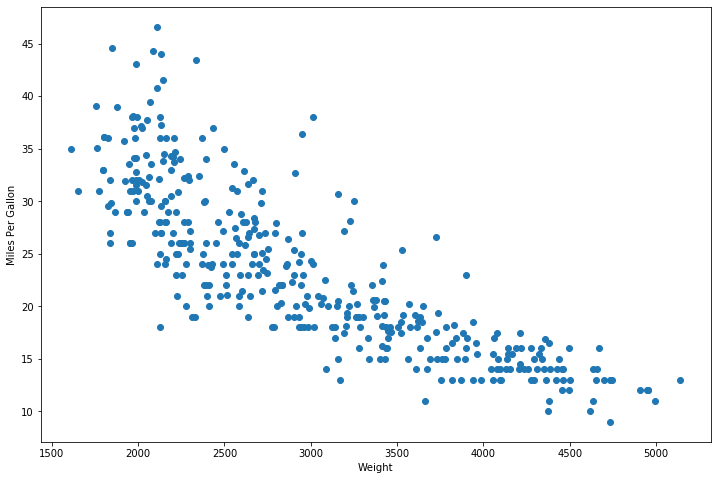

In [34]:
fig ,ax = plt.subplots(figsize= (12,8))

plt.scatter(data.weight,data.mpg)

plt.xlabel("Weight")
plt.ylabel("Miles Per Gallon")

plt.show()

definitely there is a downward trend here. It seems like greater the weight of the car, lower its mileage.

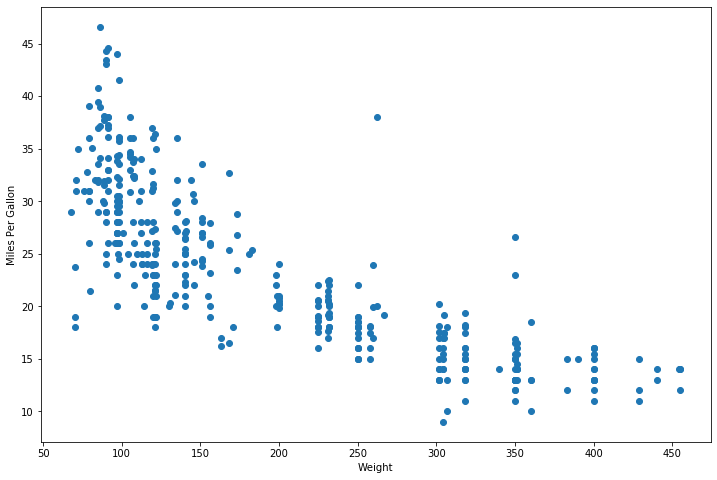

In [35]:
fig ,ax = plt.subplots(figsize= (12,8))

plt.scatter(data.displacement,data.mpg)

plt.xlabel("Weight")
plt.ylabel("Miles Per Gallon")

plt.show()

 What about how the car is positioned relative to the ground, the displacement of the car versus mileage, is there any relationship? And once again, the visualization seems to say yes. It seems like greater the displacement of the car off the ground, lower the miles per gallon it travels. This pairwise exploration of variables really helps us cement our understanding of the underlying dataset

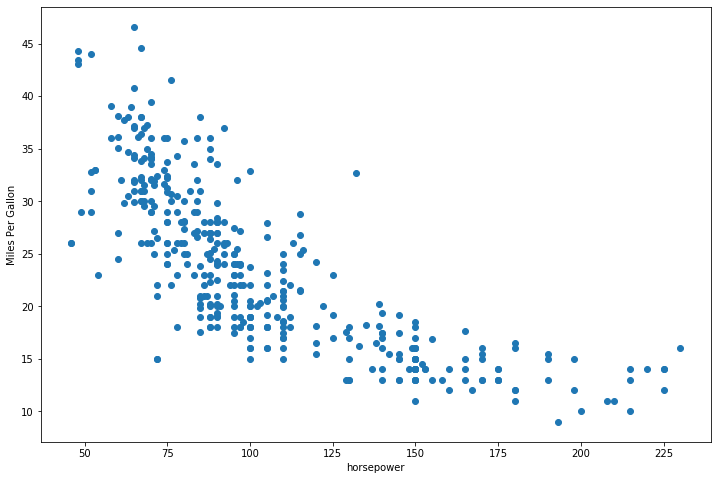

In [39]:
fig ,ax = plt.subplots(figsize= (12,8))

plt.scatter(data.horsepower,data.mpg)

plt.xlabel("horsepower")
plt.ylabel("Miles Per Gallon")

plt.show()

What about horsepower, does it affect the miles per gallon? Yes, indeed, it does. Remember that visualizations are not perfect. They are great at getting you a feel for your data. In order to assess the significance of these relationships, you'll need additional statistical analysis.

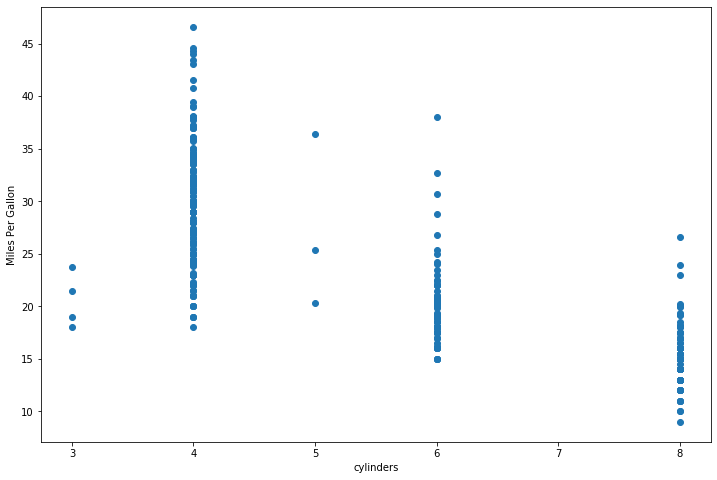

In [41]:
fig ,ax = plt.subplots(figsize= (12,8))

plt.scatter(data.cylinders,data.mpg)

plt.xlabel("cylinders")
plt.ylabel("Miles Per Gallon")

plt.show()

cylinders versus mpg. And this scatter plot definitely seems to be a little harder to understand as compared with others. Cars with four cylinders overall seem to have the best miles per gallon. 

In [42]:
correlation  = data.corr()
correlation

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


When you train your machine learning model, you feed it features that you think are significant. Now it's quite possible that your features themselves have interrelationships or correlations with one another. Correlations is a statistical measure that tells you whether and how strongly pairs of variables are related. Data frames offer this nifty little core function that will list out pairwise correlations between every pair of variables in your dataset. Correlation values are floating point numbers between -1 and 1. One implies a perfect positive correlation between two variables. You can see here that every variable is perfectly positively correlated with itself. Positive correlation implies that two variables move together in the same direction. A negative correlation implies that the two variables move in different directions. The raw correlation numbers tell us that acceleration is positively correlated with the mileage per gallon. You can also see that weight is negatively correlated with miles per gallon. In fact, weight is highly negatively correlated, - 0.83. Viewing correlations with the raw numbers is hard, which is why we use a visualization technique called the heatmap in order to view correlations in our data. 


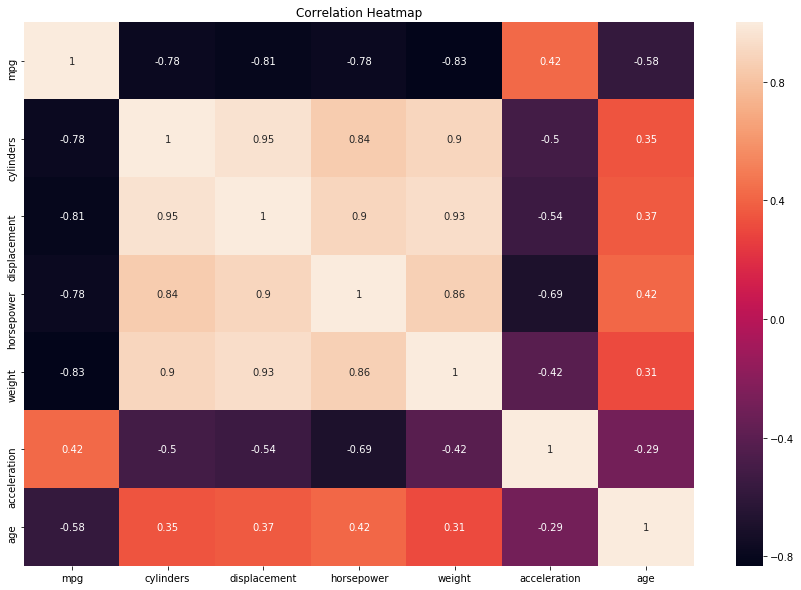

In [44]:
fig,ax = plt.subplots(figsize=(15,10))

sns.heatmap(correlation,annot=True)
plt.title("Correlation Heatmap")
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

plt.show()

When we pass in annot is equal to True to the heatmap in Seaborn, it will print out the actual correlation number along with the color-coded grid. And this is what a heatmap looks like. Lighter colors tending towards cream denote positive correlation, darker colors tending towards black denote negative correlation. This value of - 0.58 is in the mpg row and the age column. This shows that the miles per gallon seems very negatively correlated with the age of the car.

In [45]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,35.0,4,72.0,69,1613,18.0,49
1,26.0,4,98.0,90,2265,15.5,47
2,23.7,3,70.0,100,2420,12.5,40
3,33.0,4,105.0,74,2190,14.2,39
4,30.5,4,98.0,63,2051,17.0,43


Shuffling data helps to avoid capturing unwanted patterns in data. . Machine learning models, typically neural networks, are likely to pick up patterns even in the order you feed in data, so it's important that your data be shuffled. 

Now that we have our data cleaned and processed, we can now save it as a csv file which inturn can be used for buildng models

In [46]:
data.to_csv('../datasets/auto-mpg-processed.csv',index=False)

In [56]:
! dir ..\datasets

 Volume in drive C is Acer
 Volume Serial Number is 7466-65B0

 Directory of C:\Users\LOCALGHOST\Desktop\MYL-V2\MYLEARNING\MACHINE_LEARNING\SCIKIT-LEARN\COURSE - 03\datasets

09-08-2020  22:10    <DIR>          .
09-08-2020  22:10    <DIR>          ..
14-08-2020  20:16            11,888 auto-mpg-processed.csv
24-02-2019  06:35            18,131 auto-mpg.csv
24-02-2019  06:35             7,304 exams.csv
25-02-2019  05:49       133,047,193 fashion-mnist_train.csv
25-02-2019  05:49            19,331 titanic_processed.csv
25-02-2019  05:49            61,194 titanic_train.csv
               6 File(s)    133,165,041 bytes
               2 Dir(s)  35,786,186,752 bytes free


We have our processed file